In [2]:
import yfinance as yf
from datetime import date
from datetime import timedelta
from bs4 import BeautifulSoup
import requests
import smtplib
from email.mime.text import MIMEText

In [ ]:
https://www.borsaitaliana.it/borsa/etc-etn/contratti.html?isin=GB00B15KXV33&lang=en

In [2]:
req=requests.get('https://www.borsaitaliana.it/borsa/etc-etn/scheda/GB00B15KXV33.html?lang=en')
req1=requests.get('https://www.borsaitaliana.it/borsa/etc-etn/contratti.html?isin=GB00B15KXV33&lang=en')
r=req.text

In [7]:
r1=req1.text
r1

'\r\n<!--[if IE 8]><![endif]-->\r\n<!--[if IE 9]><![endif]-->\r\n<!--[if gt IE 9]><!--><!--<![endif]-->\r\n<!--[if !IE]><!--><!--<![endif]-->\r\n\r\n \r\n\r\n<!-- Homepage -->\r\n<!-- Page/Service -->\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!--[if IE 8]><![endif]-->\r\n<!--[if IE 9]><![endif]-->\r\n<!--[if gt IE 9]><!--><!--<![endif]-->\r\n<!--[if !IE]><!--><!--<![endif]-->\r\n\r\n \r\n\r\n<!-- Homepage -->\r\n<!-- Page/Service -->\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!--[if IE 8]><![endif]-->\r\n<!--[if IE 9]><![endif]-->\r\n<!--[if gt IE 9]><!--><!--<![endif]-->\r\n<!--[if !IE]><!--><!--<![endif]-->\r\n      \r\n<!doctype html>\r\n<html class="no-js" lang="en" xmlns="http://www.w3.org/1999/html">\r\n<head>\r\n\r\n  <meta http-equiv="x-ua-compatible" content="IE=edge,chrome=1">\r\n  <!--[if gt IE 9]><!-->\r\n  <script type="text/javascript" src="/media-rwd/assets/js/bit.device.js"></script>\r\n  <![endif]-->\r\n  <meta charset="utf-8">\r\n\r\n    <title>Wisdomtree W

In [4]:
soup = BeautifulSoup(r)
soup1=BeautifulSoup(r1)

In [8]:
soup

<!--[if IE 8]><![endif]--><!--[if IE 9]><![endif]--><!--[if gt IE 9]><!--><!--<![endif]--><!--[if !IE]><!--><!--<![endif]--><!-- Homepage --><!-- Page/Service --><!--[if IE 8]><![endif]--><!--[if IE 9]><![endif]--><!--[if gt IE 9]><!--><!--<![endif]--><!--[if !IE]><!--><!--<![endif]--><!-- Homepage --><!-- Page/Service --><!--[if IE 8]><![endif]--><!--[if IE 9]><![endif]--><!--[if gt IE 9]><!--><!--<![endif]--><!--[if !IE]><!--><!--<![endif]--><!DOCTYPE html>
<html class="no-js" lang="en" xmlns="http://www.w3.org/1999/html">
<head>
<meta content="IE=edge,chrome=1" http-equiv="x-ua-compatible"/>
<!--[if gt IE 9]><!-->
<script src="/media-rwd/assets/js/bit.device.js" type="text/javascript"></script>
<meta charset="utf-8"/>
<title>Wisdomtree Wti Crude Oil Real Time Quotes | GB00B15KXV33 - Borsa Italiana</title>
<meta content="	Wisdomtree Wti Crude Oil (GB00B15KXV33). Discover real-time quotes, graphical trends, intraday, complete market data and all instrument info.
" name="description"/>

In [9]:
last_price=soup1.findAll("span", {"class":"t-text"})[0].text


In [ ]:
last_sales=soup1.findAll("span", {"class":"t-text"})[14].text
print(last_price,last_sales)

In [12]:
#Selecting the necessary data to be reported
openprice=float(soup.findAll("span", {"class": "t-text -right"})[0].text)
dayhigh=str(soup.findAll("span", {"class": "t-text -right"})[1].text)
daylow = str(soup.findAll("span", {"class": "t-text -right"})[2].text)
threshold=3.9703

In [13]:
gmail_user = 'simonas.audickas@gmail.com'
gmail_password = 
    
sent_from = "Simonas Audickas <simonas.audickas@gmail.com"
to = ['info@teipsiko.lt']


In [27]:

if float(openprice) >= threshold:
    
    subject = 'Geros Naujienos'
    body = 'Akciju atidarymo kaina virsijo '+str(threshold)+'\n\n'+'Akciju kaina dabar yra '+str(openprice)+'.\n'+'Akciju auksciausias dienos taskas '+str(dayhigh)+'\n'+"Akciju zemiausias dienos taskas "+str(daylow)+'\n'+'https://www.borsaitaliana.it/borsa/etc-etn/scheda/GB00B15KXV33.html?lang=en'
    email_text = """From: %s
To: %s
Subject: %s

%s
""" % (sent_from, ", ".join(to), subject, body)
    try:
        server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        server.ehlo()
        server.login(gmail_user, gmail_password)
        server.sendmail(sent_from, to, email_text)
        server.close()

        print ('Emailas issiustas')
    except:
        print ('Klaida...')
else:
    subject1 = 'Nieko gero del akciju'
    
    body1 = 'Akciju atidarymo kaina nevirsijo '+str(threshold)+'\n'+'Akciju kaina dabar yra '+str(openprice)+'.\n'+'Akciju auksciausias dienos taskas '+str(dayhigh)+'\n'+"Akciju zemiausias dienos taskas "+str(daylow)+'\n'+'https://www.borsaitaliana.it/borsa/etc-etn/scheda/GB00B15KXV33.html?lang=en'
            

    email_text1 = """From: %s
To: %s
Subject: %s

%s
""" % (sent_from, ", ".join(to), subject1, body1)
    try:
        server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        server.ehlo()
        server.login(gmail_user, gmail_password)
        server.sendmail(sent_from, to, email_text1)
        server.close()

        print ('Emailas issiustas')
    except:
        print ('Klaida...')



Emailas issiustas


In [38]:
s=date.today()-timedelta(days=1)
print(s)

threshold=3.9703

2021-03-24


In [35]:
help(yf)

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # Yahoo! Finance market data downloader (+fix for Pandas Datareader)
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    multi
    shared
    ticker
    tickers
    utils

CLASSES
    builtins.object
        yfinance.tickers.Tickers
   

In [39]:
data = yf.download("AZN", start="2020-01-01", end=s)


[*********************100%***********************]  1 of 1 completed


In [36]:
help(data)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[str, numpy.dtype, ForwardRef('ExtensionDtype'), NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged:: 0.25.

In [41]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,49.770000,49.939999,49.680000,49.860001,47.557510,1750000
2020-01-02,50.299999,50.490002,50.130001,50.389999,48.063030,3587300
2020-01-03,49.880001,50.380001,49.830002,50.090000,47.776886,1208700
2020-01-06,50.040001,50.220001,49.740002,49.880001,47.576584,1992300
2020-01-07,50.139999,50.299999,49.869999,50.070000,47.757809,1871900
...,...,...,...,...,...,...
2021-03-17,49.799999,50.119999,49.090000,50.070000,50.070000,12993500
2021-03-18,49.470001,49.970001,49.279999,49.330002,49.330002,9790700
2021-03-19,49.220001,49.480000,48.889999,49.209999,49.209999,6783200


In [42]:
data.reset_index()
data['Data_lagged'] = data['Open'].shift(1)
data['Data_lead']= data['Open'].shift(-1)
data['diff']= data['Open']-data['Data_lagged']
data=data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Data_lagged,Data_lead,diff
0,2019-12-31,49.770000,49.939999,49.680000,49.860001,47.557510,1750000,NaN,50.299999,NaN
1,2020-01-02,50.299999,50.490002,50.130001,50.389999,48.063030,3587300,49.770000,49.880001,0.529999
2,2020-01-03,49.880001,50.380001,49.830002,50.090000,47.776886,1208700,50.299999,50.040001,-0.419998
3,2020-01-06,50.040001,50.220001,49.740002,49.880001,47.576584,1992300,49.880001,50.139999,0.160000
4,2020-01-07,50.139999,50.299999,49.869999,50.070000,47.757809,1871900,50.040001,49.869999,0.099998
...,...,...,...,...,...,...,...,...,...,...
304,2021-03-17,49.799999,50.119999,49.090000,50.070000,50.070000,12993500,49.950001,49.470001,-0.150002
305,2021-03-18,49.470001,49.970001,49.279999,49.330002,49.330002,9790700,49.799999,49.220001,-0.329998
306,2021-03-19,49.220001,49.480000,48.889999,49.209999,49.209999,6783200,49.470001,49.980000,-0.250000
307,2021-03-22,49.980000,51.209999,49.869999,51.200001,51.200001,10092000,49.220001,49.950001,0.759998


In [43]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Data_lagged,Data_lead,diff
count,309.000000,309.000000,309.000000,309.000000,309.000000,3.090000e+02,308.000000,308.000000,308.000000
mean,51.647864,52.101553,51.085631,51.574369,50.332974,7.000468e+06,51.653377,51.653961,0.000584
std,4.009440,3.909553,3.983026,3.863373,3.876452,5.847853e+06,4.014792,4.014530,1.027162
min,36.810001,38.889999,36.150002,37.790001,36.779396,1.208700e+06,36.810001,36.810001,-4.759998
25%,49.869999,50.099998,49.419998,49.779999,48.120262,3.587300e+06,49.864999,49.869999,-0.429997
50%,52.180000,52.650002,51.439999,52.040001,50.974728,5.368800e+06,52.200001,52.200001,-0.010000
75%,54.389999,54.849998,53.770000,54.189999,53.133015,8.912800e+06,54.397499,54.397499,0.550000
max,62.689999,64.940002,57.840000,61.099998,59.466022,5.634660e+07,62.689999,62.689999,5.039997


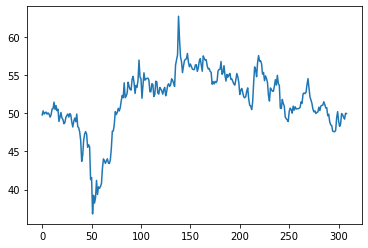

In [44]:
import matplotlib.pyplot as plt
plt.plot(data["Open"])
plt.show()